Cross-shelf transport (total) of NOGMREDI experiments
==

This notebook explores the similarities and differences between the 2 tracer transports for case NOGMREDI as well as canyon and no canyon cases. It looks at the transport normal to a shelf break wall<sup>1</sup>. Total Tracer Transport (TracTrans) is understood here as tracer transport (concentration * transport) per cell area; similarly, Total Transport (Trans) is transport per cell area, which is only the speed. This gives the following units:

$[TracTrans] = [C]ms^{-1} $

$[Trans] = [v] = ms^{-1} $

TracTrans = AdvFlux + DiffFlux / cell area

<sup>1</sup> Plane that goes from shelf-break depth to surface and all along the shelf break.

This experiment was designed to compare to REDI cases mainly. We can explore the effect of horizontal diffusivity, vertical diffuivity and open and closed boundaries.

NOGMREDI runs include the following cases:

| Run   |   $k_{h}$ ($m^2s^{-1}$)  |Tr 01 $k_{v}$ ($m^2s^{-1}$)  |  Bathymetry  |
|:-----:|:------------------------:|:---------------------: |:-----------------------|
|  02   | $10^{-5}$                 | $10^{-5}$  | Barkley-like             |
|  03   | $10^{-5}$                 | $10^{-5}$ | Barkley-like             |
|  04   | $10^{-5}$                | $10^{-5}$ | No Canyon            |
|  05   | $10^{-5}$                 |$10^{-5}$  | Barkley-like w/ walls        |
|  06   | $10^{-5}$                 | $10^{-5}$ | No canyon w/ walls            |
Closed-boundaries experiments to solve discrepancy between total mass on shelf decreasing (canyon effect) and cross-shelf transport being towards the shelf at all times.

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb

import savitzky_golay as sg

In [3]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

FluxTR01 = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/FluxTR01Glob.nc'
FluxOut1 = Dataset(FluxTR01)

CanyonGridNoC='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

CanyonStateNoC='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/stateGlob.nc'

FluxTR01NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/FluxTR01Glob.nc'
FluxTR03NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run04/FluxTR03Glob.nc'

In [4]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(CanyonGridNoC, 'HFacC')
MaskCNoC = rout.getMask(CanyonGridNoC, 'HFacC')

dxF = rout.getField(CanyonGrid, 'dxF')
drF = CanyonGridOut.variables['drF']

In [5]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [6]:
colors=['midnightblue','dodgerblue','deepskyblue','lightskyblue',
        'darkmagenta','orchid']

In [7]:
VTRAC = rout.getField(FluxTR01,'VTRAC01') # 
UTRAC = rout.getField(FluxTR01,'UTRAC01') # 

VTRACNoC = rout.getField(FluxTR01NoC,'VTRAC01') # 
UTRACNoC = rout.getField(FluxTR01NoC,'UTRAC01') # 


In [8]:
zlev = 29
SBx, SBy = sb.findShelfBreak(zlev,hFacC)
SBxx = SBx[:-1]
SByy = SBy[:-1]
slope, theta = sb.findSlope(xc,yc,SBxx,SByy)
slopeFilt = sg.savitzky_golay(slope, 11, 3) # window size 11, polynomial order 3
thetaFilt = np.arctan(slopeFilt)

zlev = 29
SBxNoC, SByNoC = sb.findShelfBreak(zlev,hFacCNoC)
SBxxNoC = SBxNoC[:-1]
SByyNoC = SByNoC[:-1]
slopeNoC, thetaNoC = sb.findSlope(xc,yc,SBxxNoC,SByyNoC)
slopeFiltNoC = sg.savitzky_golay(slopeNoC, 11, 3) # window size 11, polynomial order 3
thetaFiltNoC = np.arctan(slopeFiltNoC)


In [9]:
# TRACER 1
#FluxTR01run03 = '/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run03/FluxTR01Glob.nc'
#FluxOut1run03 = Dataset(FluxTR01run03)

In [10]:

#VTRACrun03 = rout.getField(FluxTR01run03,'VTRAC01') # 
#UTRACrun03 = rout.getField(FluxTR01run03,'UTRAC01') # 


In [11]:
times = range(18)
#ToTalTracTransRun03=np.empty(18)
ToTalTracTransBaseNoC=np.empty(18)
ToTalTracTransBase=np.empty(18)

for tt in times:
    
    VTRACPlotBase = sb.MerFluxSB(SBxx,SByy,tt,VTRAC,z,xc,zlev,hFacC,MaskC)
    UTRACPlotBase = sb.ZonFluxSB(SBxx,SByy,tt,UTRAC,z,xc,zlev,hFacC,MaskC)
    
    #VTRACPlot3 = sb.MerFluxSB(SBxx,SByy,tt,VTRACrun03,z,xc,zlev,hFacC,MaskC)
    #UTRACPlot3 = sb.ZonFluxSB(SBxx,SByy,tt,UTRACrun03,z,xc,zlev,hFacC,MaskC)
    
    VTRACPlotNoC = sb.MerFluxSB(SBxxNoC,SByyNoC,tt,VTRACNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlotNoC = sb.ZonFluxSB(SBxxNoC,SByyNoC,tt,UTRACNoC,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    #TracTrans3 =  VTRACPlot3[:,4:-5]*np.cos(thetaFilt) + UTRACPlot3[:,4:-4]*np.sin(-thetaFilt) 
    TracTransNoC =  VTRACPlotNoC[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlotNoC[:,4:-4]*np.sin(-thetaFiltNoC) 
    TracTransBase =  VTRACPlotBase[:,4:-5]*np.cos(thetaFilt) + UTRACPlotBase[:,4:-4]*np.sin(-thetaFilt) 
    
    #ToTalTracTransRun03[tt]=np.sum(TracTrans3)
    ToTalTracTransBase[tt]=np.sum(TracTransBase)
    ToTalTracTransBaseNoC[tt]=np.sum(TracTransNoC)
    

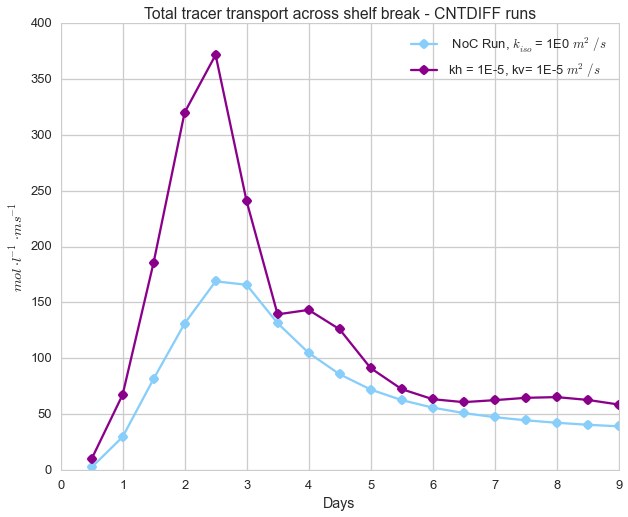

In [12]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)

times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [time/2.0+0.5 for time in times]

figSize=(10,8)
numCols = 1
numRows = 1

unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'


fig44 = plt.figure(figsize=figSize)
plt.subplot(numRows,numCols,1)
ax = plt.gca()
#ax.plot(times,ToTalTracTransRun03[:],'o-',color=colors[1],label = 'kh = 1E-5, kv= 1E-5 $m^2/s$ ')
ax.plot(times,ToTalTracTransBaseNoC[:],'o-',color=colors[3],label = ' NoC Run, $k_{iso}$ = 1E0 $m^2/s$ ')    
ax.plot(times,ToTalTracTransBase[:],'o-',color=colors[4],label = 'kh = 1E-5, kv= 1E-5 $m^2/s$ ')

handles, labels = ax.get_legend_handles_labels()
display = (0,1,2,3,4)
ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display],loc=0)
   
    
plt.xlabel('Days')
plt.ylabel(unitsTr)
plt.title('Total tracer transport across shelf break - CNTDIFF runs')
    

In [13]:
#sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)

#times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
#times = [time/2.0+0.5 for time in times]

#figSize=(10,8)
#numRows = 1

#unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'


#fig44 = plt.figure(figsize=figSize)
#plt.subplot(numRows,numCols,1)
#ax = plt.gca()

#ax.plot(times,ToTalTracTransRun03[:]-ToTalTracTransBase[:],'o-',color=colors[1],label = 'Minus Base case $k_{iso}$ = 1 $m^2/s$')
    
#handles, labels = ax.get_legend_handles_labels()
#display = (0,1,2,3,4)
#ax.legend([handle for i,handle in enumerate(handles) if i in display],
#          [label for i,label in enumerate(labels) if i in display],loc=0)
   
    
#plt.xlabel('Days')
#plt.ylabel(unitsTr)
#plt.title('Total tracer transport across shelf break - REDI effect')
   

### Closed boundary effects

In [14]:
# Until I get the flux diagnostics, I have to make the UTRAC's and VTRAC's.

CanyonStateCl='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/stateGlob.nc'
CanyonStateClOut = Dataset(CanyonStateCl)

CanyonPtracersCl='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/ptracersGlob.nc'

CanyonStateNoCCl='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run06/stateGlob.nc'
CanyonStateNoCClOut = Dataset(CanyonStateNoCCl)

CanyonPtracersNoCCl='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run06/ptracersGlob.nc'


# Until I get the flux diagnostics, I have to make the UTRAC's and VTRAC's.

#FluxTR013d = '/Volumes/MOBY/3DDIFF/run01/FluxTR01Glob.nc'
#FluxOut13d = Dataset(FluxTR013d)

#FluxTR033d = '/Volumes/MOBY/3DDIFF/run03/FluxTR01Glob.nc'
#FluxOut33d = Dataset(FluxTR033d)


In [15]:
#UTRAC013d = rout.getField(FluxTR013d,'UTRAC01') # 
#VTRAC013d = rout.getField(FluxTR013d,'VTRAC01') # 
#UTRAC033d = rout.getField(FluxTR033d,'UTRAC01') # 
#VTRAC033d = rout.getField(FluxTR033d,'VTRAC01') # 

V = rout.getField(CanyonStateCl,'V') # 
U = rout.getField(CanyonStateCl,'U') # 

V2 = rout.getField(CanyonStateNoCCl,'V') # 
U2 = rout.getField(CanyonStateNoCCl,'U') # 

UnstagU = (U[...,:-1]+U[...,1:])/2.0 
UnstagV = (V[...,:-1,:]+V[...,1:,:])/2.0 

UnstagU2 = (U2[...,:-1]+U2[...,1:])/2.0 
UnstagV2 = (V2[...,:-1,:]+V2[...,1:,:])/2.0 

TimeUnstagU = (UnstagU[:-1,...]+UnstagU[1:,...])/2.0 
TimeUnstagV = (UnstagV[:-1,...]+UnstagV[1:,...])/2.0 

TimeUnstagU2 = (UnstagU2[:-1,...]+UnstagU2[1:,...])/2.0 
TimeUnstagV2 = (UnstagV2[:-1,...]+UnstagV2[1:,...])/2.0 

Tr1run05 = rout.getField(CanyonPtracersCl,'Tr1') # 
Tr1run06 = rout.getField(CanyonPtracersNoCCl,'Tr1') # 


TimeUnstagTr1run05 = (Tr1run05[:-1,...]+Tr1run05[1:,...])/2.0 
TimeUnstagTr1run06 = (Tr1run06[:-1,...]+Tr1run06[1:,...])/2.0 


In [16]:
UTRAC01run05 = TimeUnstagU*TimeUnstagTr1run05
VTRAC01run05 = TimeUnstagV*TimeUnstagTr1run05


In [17]:
UTRAC01run06 = TimeUnstagU2*TimeUnstagTr1run06
VTRAC01run06 = TimeUnstagV2*TimeUnstagTr1run06


In [18]:
SBxNoC, SByNoC = sb.findShelfBreak(zlev,hFacCNoC)
SBxxNoC = SBxNoC[:-1]
SByyNoC = SByNoC[:-1]
slopeNoC, thetaNoC = sb.findSlope(xc,yc,SBxxNoC,SByyNoC)
#slopeFiltNoC = sg.savitzky_golay(slopeNoC, 11, 3) # window size 11, polynomial order 3
slopeFiltNoC = slopeNoC
thetaFiltNoC = np.arctan(slopeFiltNoC)

times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times2 = range(18)
zlev = 29

ToTalTracTransRun05=np.empty(19)
ToTalTracTransRun06=np.empty(19)

for tt in times:
    
    VTRACPlot1 = sb.MerFluxSBNoUnstag(SBxx,SByy,tt,VTRAC01run05,z,xc,zlev,hFacC,MaskC)
    UTRACPlot1 = sb.ZonFluxSBNoUnstag(SBxx,SByy,tt,UTRAC01run05,z,xc,zlev,hFacC,MaskC)
    
    VTRACPlot2 = sb.MerFluxSBNoUnstag(SBxxNoC,SByyNoC,tt,VTRAC01run06,z,xc,zlev,hFacCNoC,MaskCNoC)
    UTRACPlot2 = sb.ZonFluxSBNoUnstag(SBxxNoC,SByyNoC,tt,UTRAC01run06,z,xc,zlev,hFacCNoC,MaskCNoC)
    
    TracTrans1 =  VTRACPlot1[:,4:-5]*np.cos(thetaFilt) + UTRACPlot1[:,4:-4]*np.sin(-thetaFilt) 
    TracTrans2 =  VTRACPlot2[:,4:-5]*np.cos(thetaFiltNoC) + UTRACPlot2[:,4:-4]*np.sin(-thetaFiltNoC) 
    
    ToTalTracTransRun05[tt]=np.sum(TracTrans1)
    ToTalTracTransRun06[tt]=np.sum(TracTrans2)
    

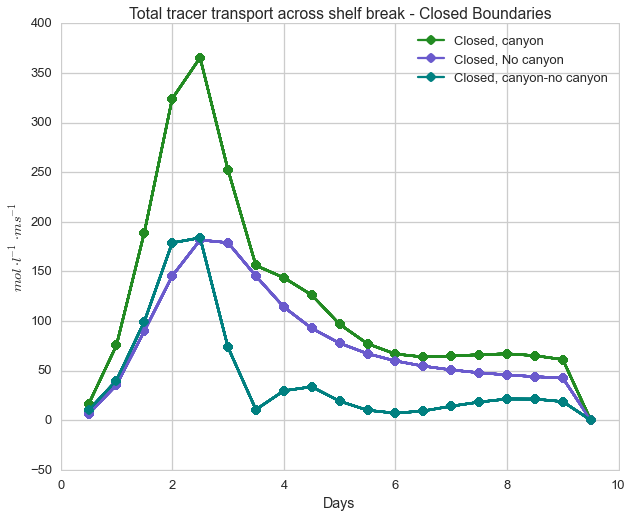

In [19]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)
#times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5]
times2 = range(18)
figSize=(10,8)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,ToTalTracTransRun05[:],'o-',color='ForestGreen',label = 'Closed, canyon')
    ax.plot(times,ToTalTracTransRun06[:],'o-',color='SlateBlue',label = 'Closed, No canyon')
    ax.plot(times,ToTalTracTransRun05[:]-ToTalTracTransRun06[:],'o-',color = 'Teal',label = 'Closed, canyon-no canyon')
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
              [label for i,label in enumerate(labels) if i in display])
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Closed Boundaries')
    

In [20]:
BaseNOC_UVNOC = np.array([ -4.11100254,  -7.02604846, -10.73515833, -17.80212696, -16.89982316, 
                          -16.87235791, -16.3161415,  -10.6054961,   -7.50105873 , -5.67422559,
                          -4.28515637,  -3.39858816,  -2.8849683,   -2.6280249,   -2.52206256,
                          -2.50336538,  -2.57915415,  -2.68915457])


Base_UV = np.array([ -6.16868038,  -7.95033071,  -3.04086136,  -3.26133545,   7.1001724,
                    -10.79765623, -16.10778602 ,  0.10108158,   0.97792936,  -3.4755619,
                    -2.32794817,  -0.83518303,  -1.00069174,  -0.93326735,  -0.24154513,
                    -0.33243428,  -0.76748376,  -0.809773  ])




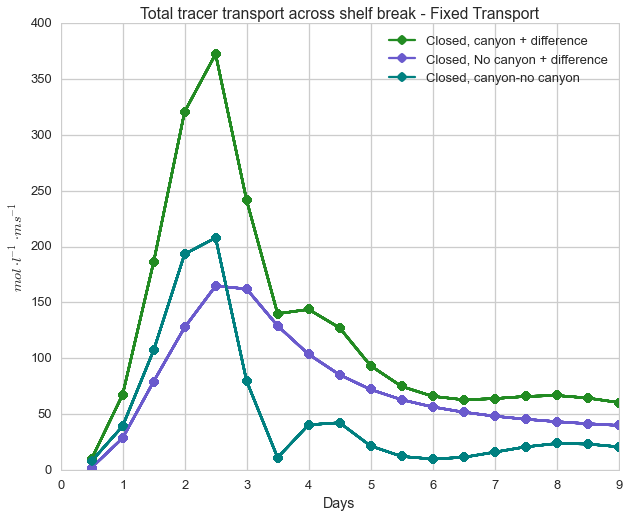

In [21]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)
#times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9]
times2 = range(18)
figSize=(10,8)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,ToTalTracTransRun05[:-1]+Base_UV,'o-',color='ForestGreen',label = 'Closed, canyon + difference')
    ax.plot(times,ToTalTracTransRun06[:-1]+BaseNOC_UVNOC,'o-',color='SlateBlue',label = 'Closed, No canyon + difference')
    ax.plot(times,(ToTalTracTransRun05[:-1]+Base_UV)-(ToTalTracTransRun06[:-1]+BaseNOC_UVNOC),'o-',color = 'Teal',label = 'Closed, canyon-no canyon')
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
              [label for i,label in enumerate(labels) if i in display])
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Fixed Transport')
    

### Nothern boundary transport

In [48]:

VTRACUnstag = (VTRAC[...,:-1,:]+VTRAC[...,1:,:])/2.0 
VTRACNoCUnstag = (VTRACNoC[...,:-1,:]+VTRACNoC[...,1:,:])/2.0 


mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand+np.zeros(VTRACUnstag.shape)

mask_expand_NoC = np.expand_dims(MaskCNoC,0)
mask_expand_NoC = mask_expand+np.zeros(VTRACNoCUnstag.shape)


TotalTracTransNorth=np.sum(np.sum(np.ma.masked_array(VTRAC[:,:,358,:],mask=mask_expand[:,:,358,:]),axis=1),axis=1)
TotalTracTransNorthNoC=np.sum(np.sum(np.ma.masked_array(VTRACNoC[:,:,358,:],mask=mask_expand_NoC[:,:,358,:]),axis=1),axis=1)



  

In [49]:
print(ToTalTracTransBase.shape)

(18,)


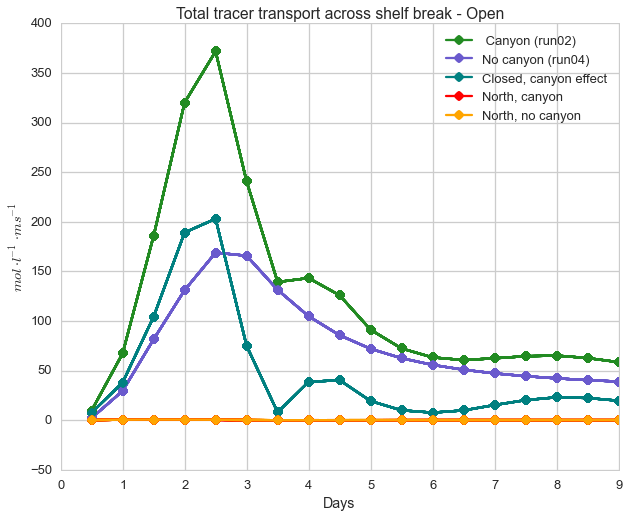

In [50]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)
#times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9]
times2 = range(18)
figSize=(10,8)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,ToTalTracTransBase[:],'o-',color='ForestGreen',label = ' Canyon (run02)')
    ax.plot(times,ToTalTracTransBaseNoC[:],'o-',color='SlateBlue',label = 'No canyon (run04)')
    ax.plot(times,ToTalTracTransBase[:]-ToTalTracTransBaseNoC[:],'o-',color = 'Teal',label = 'Closed, canyon effect')
    ax.plot(times,TotalTracTransNorth[:],'o-',color = 'Red',label = 'North, canyon')
    ax.plot(times,TotalTracTransNorthNoC[:],'o-',color = 'Orange',label = 'North, no canyon')
    
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,3,4)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
              [label for i,label in enumerate(labels) if i in display])
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Open')
    

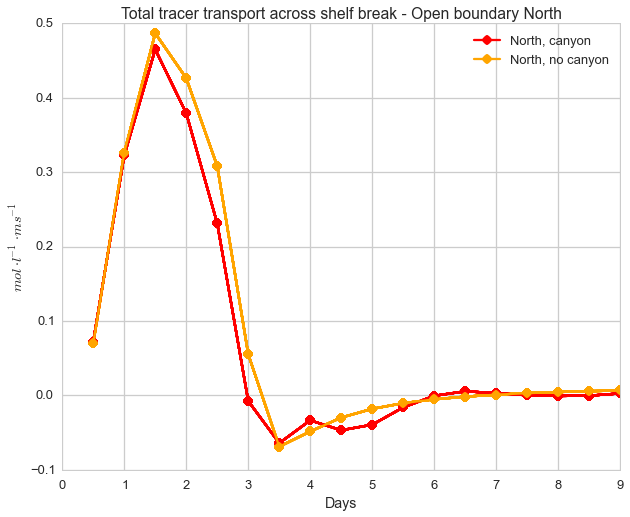

In [51]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)
#times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9]
times2 = range(18)
figSize=(10,8)
numCols = 1
numRows = 1
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsVel = '$ms^{-1}$'

kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,TotalTracTransNorth[:],'o-',color = 'Red',label = 'North, canyon')
    ax.plot(times,TotalTracTransNorthNoC[:],'o-',color = 'Orange',label = 'North, no canyon')
    
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
              [label for i,label in enumerate(labels) if i in display])
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total tracer transport across shelf break - Open boundary North')
